In [20]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv')

In [21]:
df.sample(15)

,Category,Message
2741,ham,Nothing. Can...
4949,spam,"Hi this is Amy, we will be sending you a free ..."
77,ham,I like you peoples very much:) but am very shy...
273,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
5415,ham,You should get more chicken broth if you want ...
1200,ham,NEFT Transaction with reference number &lt;#&...
5058,ham,Hey next sun 1030 there's a basic yoga course....
212,ham,Home so we can always chat
5032,ham,Hey... Very inconvenient for your sis a not huh?
2948,ham,Leave it. U will always be ignorant.


- encode spam and ham; use lambda function
- split training and testing
- create bag of words(CountVectorizer from sklearn)
- create Naive Bayes model
- test 
- Evaluate

# encode spam and ham; use lambda function

In [27]:
codes = [lamda x: x in df["Category"]]

In [40]:
df["Codes"] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df["Codes"].value_counts()

0    4825
1     747
Name: Codes, dtype: int64

In [44]:
df.sample(10)

,Category,Message,Codes
5394,ham,I dont know exactly could you ask chechi.,0
5127,ham,Cuz ibored. And don wanna study,0
2897,spam,pdate_Now - Double mins and 1000 txts on Orang...,1
4657,ham,"K, I'll work something out",0
721,ham,Oh is it? Send me the address,0
3066,ham,"Sounds good, keep me posted",0
5075,ham,I want to sent &lt;#&gt; mesages today. Thats...,0
2860,ham,Do you know why god created gap between your f...,0
3090,ham,What Today-sunday..sunday is holiday..so no wo...,0
633,ham,Oh that was a forwarded message. I thought you...,0


# split training and testing

In [38]:
from sklearn.model_selection import train_test_split

In [142]:
x, y = df.drop(["Codes", "Category"], axis=1), df["Codes"]

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [144]:
x_test

,Message
2112,Yar he quite clever but aft many guesses lor. ...
4589,I wanted to wish you a Happy New Year and I wa...
3298,Todays Voda numbers ending 5226 are selected t...
4661,You call him and tell now infront of them. Cal...
2099,"No dice, art class 6 thru 9 :( thanks though. ..."
...,...
3763,FREE for 1st week! No1 Nokia tone 4 ur mob eve...
2577,In sch but neva mind u eat 1st lor..
4953,"Welcome to Select, an O2 service with added be..."
4305,"Good good, billy mates all gone. Just been jog..."


# create bag of words(CountVectorizer from sklearn)

In [145]:
from sklearn.feature_extraction.text import CountVectorizer

In [194]:
cv = CountVectorizer()
cv

# fit the vectorizer on the corpus and convert to array
x_train_cv = cv.fit_transform(x_train.Message)
x_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Building Model

In [148]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()
model.fit(x_train_cv, y_train)

x_test_cv = cv.transform(x_test.Message)
score = model.score(x_test_cv, y_test)
print(f"The accuracy of the model is: {score*100:.2f}%")

MultinomialNB()

In [151]:
email_ham = ["hey, i like you but this wont work"]
email_ham_cv = cv.transform(email_ham)
model.predict(email_ham_cv)

array([0], dtype=int64)

In [152]:
email_spam = ["10,0000rs is deposited in your rummy account, click to avail."]
email_spam_cv = cv.transform(email_spam)
model.predict(email_spam_cv)

array([1], dtype=int64)

# Test

In [155]:
x_test_cv = cv.transform(x_test.Message)
score = model.score(x_test_cv, y_test)
print(f"The accuracy of the model is: {score*100:.2f}%")

The accuracy of the model is: 98.48%


# Tuning
- Assumption: will the models performance increases if i, eliminate the elements with lowest frequency ?

In [206]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x_train_cv = cv.fit_transform(x_train.Message)

# Calculate the frequency of each word in the training data
word_freq = {}
for key, value in cv.vocabulary_.items():
    word_freq[key] = x_train_cv[:, value].sum()
#print(word_freq)

# Determine the cutoff frequency below which words will be removed
cutoff_freq = 3

# Identify the words to keep
keep_words = [key for key, freq in word_freq.items() if freq > cutoff_freq]
#print(keep_words)

# Create a new CountVectorizer with only the words to keep
cv = CountVectorizer(vocabulary=keep_words)

# Fit the new vectorizer on the training data and transform it
x_train_cv = cv.fit_transform(x_train.Message)

# Train the model and calculate the accuracy as before
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_cv, y_train)

x_test_cv = cv.transform(x_test.Message)
score = model.score(x_test_cv, y_test)
print(f"The accuracy of the model is: {score*100:.2f}%")


The accuracy of the model is: 98.21%


## Assumption is wrong

# lets put the predictions and target variables in a data frame

In [232]:
# Predict labels for test set
y_pred = model.predict(x_test_cv)

# Create DataFrame with predictions and actual labels
results = pd.DataFrame({'Message': x_test.Message, 'Actual': y_test, 'Predicted': y_pred})

#results.sample(20)

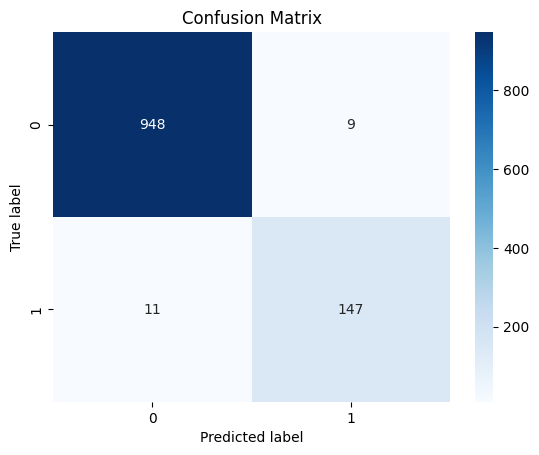

In [233]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted labels for the test set
y_pred = model.predict(x_test_cv)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()


# Demonstration of how CountVectorizer works

In [15]:
class CountVectorizer:
    def __init__(self):
        self.vocab = {}
        self.word_counts = []
        
    def fit_transform(self, corpus):
        for document in corpus:
            # split document into words and count the frequency of each word
            word_counts = {}
            words = document.split()
            for word in words:
                if word in word_counts:
                    word_counts[word] += 1
                else:
                    word_counts[word] = 1
                    
                if word not in self.vocab:
                    self.vocab[word] = len(self.vocab)
            
            # append the word counts to the document-term matrix
            self.word_counts.append(word_counts)
        
        # create the document-term matrix using the word counts and vocabulary
        dt_matrix = []
        for word_count in self.word_counts:
            row = [0] * len(self.vocab)
            for word, count in word_count.items():
                row[self.vocab[word]] = count
            dt_matrix.append(row)
        
        return dt_matrix


In [19]:
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

cv = CountVectorizer()
dt_matrix = cv.fit_transform(corpus)
np.array(dt_matrix)


array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]])